本文主要汇总一下机器学习模型评估的一些方法。

- 分类模型
    - 二分类模型
        - 常用指标            
        - skewed数据
        - ROC曲线
        - PR（Precision-Recall）曲线
        - 代价曲线
    - 多分类模型
- 回归模型    

# 1. 分类模型
## 1.1 二分类模型
### 1.11 常用指标

![Confusion Matrix, 混淆矩阵](../../image/confusion_matrix.png)

准确率： $Accuracy=\frac {TP+TN} {Total}$

错误率:  $Error Rate=\frac {FN+FP} {Total} $     

正例覆盖率（R/TPR/Sensitivity）：$Recall=\frac {TP} {TP+FN} $  

正例命中率(P): $Precision=\frac {TP} {TP+FP}$  

负例覆盖率（TNR）: $Specificity=\frac {TN} {TN+FP} $  

1-Specificity : $FPR=\frac {FP} {TN+FP} $ 

F1值：$ F1 = \frac {2PR} {P+R} = \frac {2TP} {2TP+FN+FP}$

我们都希望一个模型的Recall和Precsion都非常高，但实际情况下，有的时候很难兼顾，这种情况下，就要做一些选择。

- Recall优先：   
比如：地震的预测：一般都希望每次地震都预测出来，这个时候可以牺牲一点PRECISION。癌症预测也是这样，所以往往检测为阳性，也不用过于担心，因为还有极大的概率是没有问题的。

    对于这类应用，要求保证一定Precision的前提下，尽量提高Recall
    

- Precision优先  
比如： 嫌疑人定罪基于不错怪一个好人的原则，对于嫌疑人的定罪要求是非常准确的。有时候会放过了一些罪犯，但这也是值得的。垃圾邮件的鉴别也是这样。

    对于这类应用，要求保证一定Recall的前提下，尽量提高Precision
    
根本上来说，Recall优先指的是TP的收益很高或者FN的成本很高，FP成本不高，所以要减少FN，而Precison优先指的是FP的成本很高，所以要减少FP。由于不同场景，我们的选择往往也不同。

- Recall优先：TP收益高或FN成本高，FP成本不高
- Precision优先 ：FP成本高

比如：传统的邮寄广告，由于邮寄成本不高，所以FP的成本很低，而TP的收益又很高，所以执行Recall优先。而现在的微信营销里面，为了不使得客户厌烦，也就是说，虽然TP收益很高，但由于FP的成本也很高（长期来看），所以会执行Precision优先。





### 1.12 skewed数据


### 1.13 ROC曲线(部分转自http://www.jianshu.com/p/c61ae11cc5f6)

AUC (Area Under Curve) 被定义为ROC曲线下的面积。

![ROC](../../image/roc.png)



ROC曲线上的每一个点对应于一个threshold，对于一个分类器，每个threshold下会有一个TPR和FPR。理想情况下，TPR应该接近1，FPR应该接近0。

- 横轴FPR：1-TNR，1-Specificity，FPR越大，实际负类中被预测为正例的比例大。  
- 纵轴TPR：Sensitivity(正类覆盖率)，TPR越大，实际正类被预测为正例的比例达。  
- 理想目标：TPR=1，FPR=0，即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好。

AUC (Area Under Curve) 被定义为ROC曲线下的面积，即图中淡蓝色部分的面积。
- AUC = 1，是完美分类器，采用这个预测模型时，存在至少一个阈值能得出完美预测。
- 0.5 < AUC < 1，优于随机猜测。这个分类器（模型）妥善设定阈值的话，能有预测价值。
- AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。
- AUC < 0.5，比随机猜测还差；但只要总是反预测而行，就优于随机猜测。

.90-1 = excellent (A)  
.80-.90 = good (B)  
.70-.80 = fair (C)   
.60-.70 = poor (D)  
.50-.60 = fail (F)  


In [1]:
# Package imports
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

import eipi10.ml.neural_network as nn
import eipi10.ml.linear_model as lm
from eipi10.ml.planar_utils import *
from eipi10.ml.utils import *
from eipi10.test.testCases_v2 import *
from eipi10.ml.predictor import ClassificationPredictor, EvaluateCurve
import logging

%matplotlib inline
pd.set_option('display.width', 100)

#### 数据

train_X_orig.shape=(2, 300)
train_Y_orig.shape=(1, 300)
test_X_orig.shape=(2, 100)
test_Y_orig.shape=(1, 100)


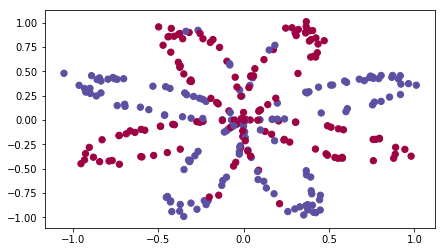

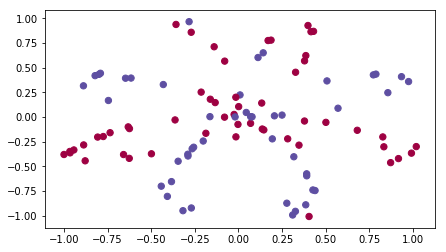

In [2]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X_orig, train_Y_orig, test_X_orig, test_Y_orig = load_petal_dataset()
print("train_X_orig.shape={}".format(train_X_orig.shape))
print("train_Y_orig.shape={}".format(train_Y_orig.shape))
print("test_X_orig.shape={}".format(test_X_orig.shape))
print("test_Y_orig.shape={}".format(test_Y_orig.shape))

# Visualize train data
plt.scatter(train_X_orig.T[:, 0], train_X_orig.T[:, 1], c=train_Y_orig.T, s=40, cmap=plt.cm.Spectral)
plt.show()
plt.scatter(test_X_orig.T[:, 0], test_X_orig.T[:, 1], c=test_Y_orig.T, s=40, cmap=plt.cm.Spectral)
plt.show()

#### Logistic Regression

       accuracy      cost    recall  precision  specificity        f1   tp  fn  fp  tn
train  0.626667  0.599039  0.699346   0.618497     0.551020  0.656442  107  46  66  81
test   0.560000  0.634006  0.723404   0.523077     0.415094  0.607143   34  13  31  22
----------------------------------------------------------------------------------------
       accuracy      cost    recall  precision  specificity        f1   tp  fn  fp   tn
train  0.803333  0.539419  0.666667   0.927273     0.945578  0.775665  102  51   8  139
test   0.800000  0.571047  0.638298   0.909091     0.943396  0.750000   30  17   3   50
----------------------------------------------------------------------------------------
       accuracy      cost    recall  precision  specificity        f1   tp  fn  fp   tn
train  0.786667  0.493533  0.673203   0.880342     0.904762  0.762963  103  50  14  133
test   0.780000  0.523618  0.595745   0.903226     0.943396  0.717949   28  19   3   50


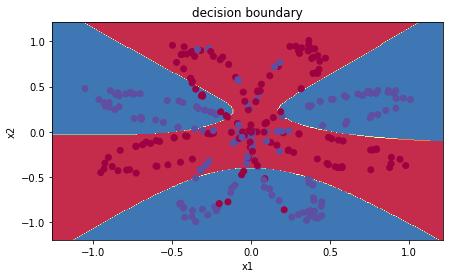

In [3]:

train_X_orig, train_Y_orig, test_X_orig, test_Y_orig = load_petal_dataset()
train_X, train_Y, test_X, test_Y = (train_X_orig, train_Y_orig, test_X_orig, test_Y_orig)
train_X = map_feature(train_X, 3)
test_X = map_feature(test_X, 3)

model = lm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=L2Regularizer(0), iterator=NumberIterator(100),
                              optimizer=GradientOptimizer(0.5), initializer=WeightInitializer(),
                              keep_cost_num_epoch=50)

model.fit(train_X, train_Y, print_cost=False, print_num_epoch=50)
ClassificationPredictor(model).print_metrics(train_X, train_Y, test_X=test_X, test_Y=test_Y)
metrics100 = EvaluateCurve.generate_data(train_X, train_Y, model=model)
print("----------------------------------------------------------------------------------------")

model.iterator = NumberIterator(200)
model.fit(train_X, train_Y, print_cost=False, print_num_epoch=50)
ClassificationPredictor(model).print_metrics(train_X, train_Y, test_X=test_X, test_Y=test_Y)
metrics200 = EvaluateCurve.generate_data(train_X, train_Y, model=model)

print("----------------------------------------------------------------------------------------")
model.iterator = NumberIterator(400)
model.fit(train_X, train_Y, print_cost=False, print_num_epoch=50)
ClassificationPredictor(model).print_metrics(train_X, train_Y, test_X=test_X, test_Y=test_Y)
metrics400 = EvaluateCurve.generate_data(train_X, train_Y, model=model)

plot_decision_boundary_map_feature(ClassificationPredictor(model), train_X_orig, train_Y, degree=3)

从结果上来看，迭代200次似乎结果更好（说明learning_rate可能偏大一些）。但如果比较ROC曲线，可以发现迭代400还是好一些（见下文）。

#### Neural Network

/eipi10/python-book/arsenal/eipi10/ml/utils.py:99: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1-A)))/m
/eipi10/python-book/arsenal/eipi10/ml/utils.py:99: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1-A)))/m


       accuracy      cost   recall  precision  specificity        f1   tp  fn  fp   tn
train      0.88  0.213257  0.96732   0.826816     0.789116  0.891566  148   5  31  116
test       0.85  0.284286  0.87234   0.820000     0.830189  0.845361   41   6   9   44


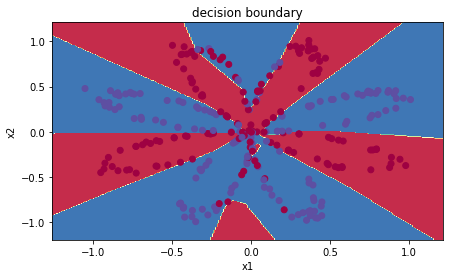

In [4]:
reload(nn)

learning_rate = 0.025

#batch
epoch_times = 500
mini_batch = 100
print_num_epoch = 50
keep_cost_num_epoch = 50

#initialize
static_weight_scale=10

#regularize
alpha = 0.01
keep_prob = 1

#optimize
beta=0.9
beta1=0.9
beta2=0.99
epsilon=1e-8

train_X, train_Y, test_X, test_Y =  (train_X_orig, train_Y_orig, test_X_orig, test_Y_orig)
# train_X, train_Y, test_X, test_Y = load_petal_dataset(num_example=2000) #增加样本，很明显提高了性能
num_neurons=[train_X.shape[0], 16, 8, 1]
activators=[Relu, Relu, Sigmoid]

model = nn.NeuralNetwork.build(
    num_neurons=num_neurons,
    activators=activators,      
    iterator=NumberIterator(epoch_times),
    initializer=HeWeightInitializer(),
    optimizer=nn.AdamOptimizer(learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon),
    keep_cost_num_epoch=keep_cost_num_epoch,
    mini_batch=mini_batch,
    regularizer=nn.L2Regularizer(alpha) ,
    keep_prob=keep_prob
)

model.fit(train_X, train_Y,  print_cost=False, print_num_epoch=print_num_epoch)

ClassificationPredictor(model).print_metrics(train_X, train_Y, test_X=test_X, test_Y=test_Y)
metrics_nn = EvaluateCurve.generate_data(train_X, train_Y, model=model)

ClassificationPredictor(model).plot_decision_boundary(train_X, train_Y)

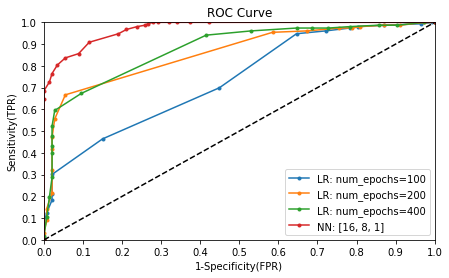

metrics100.auc=0.7344937975190076
metrics200.auc=0.8582766439909297
metrics400.auc=0.8780178738161932
metrics_nn.auc=0.9718331777155307


In [6]:
curves = {'LR: num_epochs=100': metrics100,
          'LR: num_epochs=200': metrics200,
          'LR: num_epochs=400': metrics400,
          'NN: [16, 8, 1]': metrics_nn}
EvaluateCurve.plot_roc(curves)
print("metrics100.auc={}".format(EvaluateCurve.auc(metrics=metrics100)))
print("metrics200.auc={}".format(EvaluateCurve.auc(metrics=metrics200)))
print("metrics400.auc={}".format(EvaluateCurve.auc(metrics=metrics400)))
print("metrics_nn.auc={}".format(EvaluateCurve.auc(metrics=metrics_nn)))

从图形和AUC均可明显看出神经网络的模型最好。而metrics400也要好于metrics200，这和之前的判断相反。

In [7]:
print("metrics100:\n{}".format(metrics100))
print("---------------------------------------------------------------------------------------------------")
print("metrics200:\n{}".format(metrics200))
print("---------------------------------------------------------------------------------------------------")
print("metrics400:\n{}".format(metrics400))
print("---------------------------------------------------------------------------------------------------")
print("metrics_nn:\n{}".format(metrics_nn))

metrics100:
    cut_off  accuracy      cost    recall  precision  specificity        f1   tp   fn   fp   tn
0      1.00  0.490000  0.599039  0.000000   0.000000     1.000000  0.000000    0  153    0  147
1      0.95  0.490000  0.599039  0.000000   0.000000     1.000000  0.000000    0  153    0  147
2      0.90  0.490000  0.599039  0.000000   0.000000     1.000000  0.000000    0  153    0  147
3      0.85  0.493333  0.599039  0.006536   1.000000     1.000000  0.012987    1  152    0  147
4      0.80  0.530000  0.599039  0.078431   1.000000     1.000000  0.145455   12  141    0  147
5      0.75  0.550000  0.599039  0.124183   0.950000     0.993197  0.219653   19  134    1  146
6      0.70  0.573333  0.599039  0.183007   0.903226     0.979592  0.304348   28  125    3  144
7      0.65  0.586667  0.599039  0.209150   0.914286     0.979592  0.340426   32  121    3  144
8      0.60  0.633333  0.599039  0.300654   0.938776     0.979592  0.455446   46  107    3  144
9      0.55  0.653333  0.599

### 1.13 PR（Precision-Recall）曲线

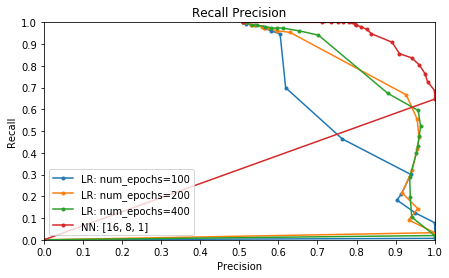

In [8]:
EvaluateCurve.plot_pr(curves)

#### 为什么使用ROC曲线（参见http://alexkong.net/2013/06/introduction-to-auc-and-roc/）

既然已经这么多评价标准，为什么还要使用ROC和AUC呢？因为ROC曲线有个很好的特性：当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变。在实际的数据集中经常会出现类不平衡（class imbalance）现象，即负样本比正样本多很多（或者相反），而且测试数据中的正负样本的分布也可能随着时间变化。下图是ROC曲线和Precision-Recall曲线5的对比：

![ROC](../../image/roc-and-precall.png)

在上图中，(a)和(c)为ROC曲线，(b)和(d)为Precision-Recall曲线。(a)和(b)展示的是分类其在原始测试集（正负样本分布平衡）的结果，(c)和(d)是将测试集中负样本的数量增加到原来的10倍后，分类器的结果。可以明显的看出，ROC曲线基本保持原貌，而Precision-Recall曲线则变化较大

这里的问题是，这个例子的数据在哪里？

@misc{chollet2015keras,
  author = {Chollet, François and others},
  title = {Keras},
  year = {2015},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{https://github.com/fchollet/keras}}
}